In [22]:
import matplotlib.pyplot as plt
import copy
import numpy as np

In [23]:
def original_graph(datas,labels,markers,colors,x_scale,y_limit=None,ylabel="Overall Delay(ms)",yscale='linear',title = 'Title',save_fig = True):
    plt.xlabel("Sample #")
    plt.ylabel(ylabel)
    x_axis = np.arange(1, len(datas[0])+1)
    x_axis *= x_scale
    if y_limit is not None:
        plt.ylim(y_limit)
    plt.yscale(yscale)
    if not save_fig:
        plt.title(title)
    plt.xlim(0,x_axis[-1]+1)
    for i in range(len(datas)):
        plt.plot(x_axis,datas[i],label = labels[i],marker=markers[i],color=colors[i])
    plt.legend(loc=1,prop={'size':9})
    plt.grid()
    
    if save_fig:
        plt.savefig(title+'.pdf')
    plt.show()

In [24]:
pred = np.load("./results/informerstack_POS_ftM_sl80_ll20_pl60_dm512_nh8_el3_dl3_df2048_atprob_fc7_ebtimeF_dtTrue_mxTrue_test_1/pred.npy")
true = np.load("./results/informerstack_POS_ftM_sl80_ll20_pl60_dm512_nh8_el3_dl3_df2048_atprob_fc7_ebtimeF_dtTrue_mxTrue_test_1/true.npy")


In [25]:
# pred = np.load("./real_prediction.npy")
# true = np.load("./test.npy")

In [26]:
# pred = np.load("./results/informerstack_POS_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc7_ebtimeF_dtTrue_mxTrue_test_1/pred.npy")
# true = np.load("./results/informerstack_POS_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc7_ebtimeF_dtTrue_mxTrue_test_1/true.npy")
print(pred.shape)


(3424, 60, 11)


In [27]:
pred = pred.reshape(-1,11)
true = true.reshape(-1,11)
check_dim = 3

In [28]:
pre_avg = []
for i in range(60,len(true)-60):
    pre_avg.append(np.mean(true[i-60:i,check_dim]))
print(len(pre_avg))


205320


In [29]:
len(true[60:])

205380

In [30]:
np.mean((true[120:,check_dim] - np.array(pre_avg))**2)

1540.4134921452749

In [31]:
np.mean((true[:,check_dim] - pred[:,check_dim])**2)

1131.3836938511954

In [32]:
np.mean((true[:-35,check_dim] - true[35:,check_dim])**2)

3424.383556965501

In [33]:
# X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

In [34]:
# plt.plot(X[:, 0], X[:, 1], 'x')
# plt.axis('equal')
# plt.show()


In [35]:
labels = ['prediction','true value']
markers = ['','']
colors = ['red','blue']

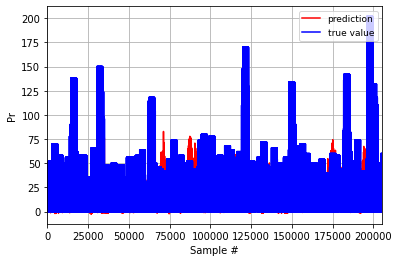

In [36]:
original_graph([pred[:,1],true[:,1]],labels,markers,colors,1,ylabel="Pr")

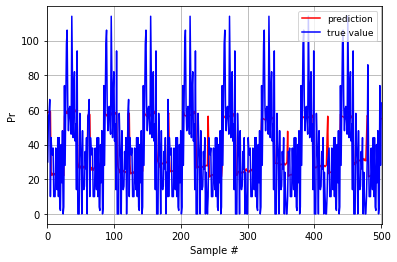

In [44]:
original_graph([pred[:500,2],true[:500,2]],labels,markers,colors,1,title="lambda=0.1",ylabel="Pr")

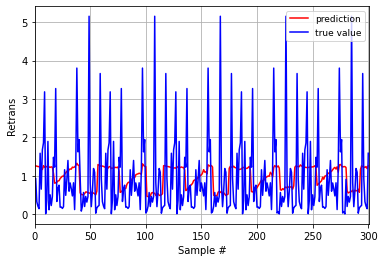

In [43]:
original_graph([pred[19700:20000,6],true[19700:20000,6]],labels,markers,colors,1,ylabel="Retrans")